# 커피지수 시각화

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [36]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [3]:
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [6]:
data_folder = '/content/mnt/MyDrive/results/CoffeeIndex'

In [51]:
df = pd.read_csv(f'{data_folder}/매장통합.csv')
df.head()

,ID,상호명_이디야,상호명_빽다방,상호명,상호명_커피빈,커피지수
0,가평,9,0.0,2.0,0.0,0.222222
1,강릉,15,2.0,5.0,0.0,0.294118
2,강진,1,0.0,0.0,0.0,0.000000
3,거제,9,0.0,6.0,0.0,0.666667
4,거창,1,1.0,0.0,0.0,0.000000


In [52]:
map_folder = '/content/mnt/MyDrive/데이터/인구소멸위기지역'

In [53]:
map_raw = pd.read_excel(f'{map_folder}/draw_korea_raw(2021).xlsx')

In [54]:
map_raw.stack()

0   7         철원
    8         화천
    9         양구
    10    고성(강원)
1   3         양주
           ...  
24  2         장흥
    3         보성
25  2         완도
    5         제주
26  5        서귀포
Length: 250, dtype: object

In [55]:
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
map.columns = ['y', 'x', 'ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [56]:
!cp $map_folder/draw_map.py .

In [57]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

In [58]:
coffee = pd.merge(map, df, how='left', on='ID').fillna(0)

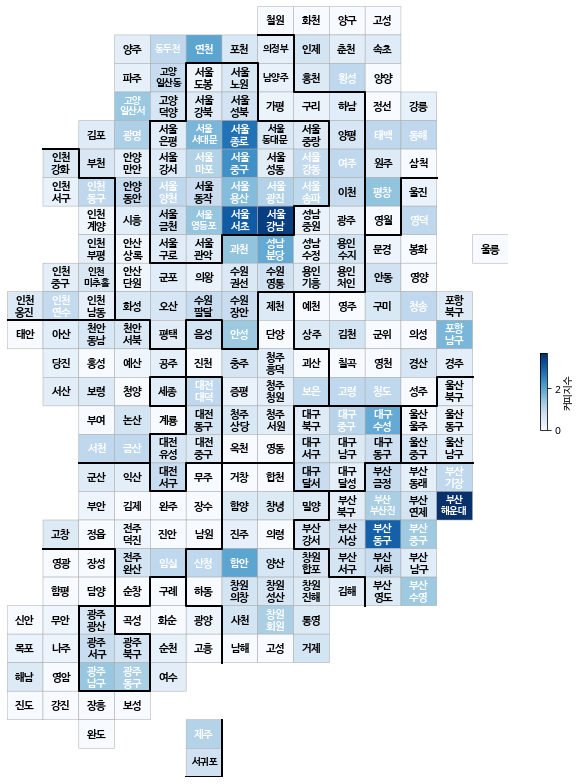

In [59]:
drawKorea('커피지수', coffee, 'Blues')

## 강사님 풀이

In [50]:
cf = pd.read_csv(f'{data_folder}/커피지수.csv')

In [61]:
df = pd.merge(map, cf, how='left')
print(df.shape)
df.head()

(250, 8)


,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
0,0,7,철원,2.0,0.0,0.0,0.0,0.000000
1,0,8,화천,1.0,0.0,0.0,1.0,0.000000
2,0,9,양구,1.0,0.0,0.0,0.0,0.000000
3,0,10,고성(강원),NaN,NaN,NaN,NaN,NaN
4,1,3,양주,17.0,7.0,0.0,1.0,0.388889


In [62]:
df.fillna(0, inplace=True)
df['이디야'] = df.이디야.astype(int)
df['스타벅스'] = df.스타벅스.astype(int)
df['커피빈'] = df.커피빈.astype(int)
df['빽다방'] = df.빽다방.astype(int)
df.head()

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
0,0,7,철원,2,0,0,0,0.000000
1,0,8,화천,1,0,0,1,0.000000
2,0,9,양구,1,0,0,0,0.000000
3,0,10,고성(강원),0,0,0,0,0.000000
4,1,3,양주,17,7,0,1,0.388889


- 커피지수

In [63]:
# 커피지수 Top 10 지역
df.sort_values(by='커피지수', ascending=False).head(10)

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
186,17,12,부산 해운대,8,33,4,2,3.700000
66,7,7,서울 강남,27,79,47,9,3.500000
65,7,6,서울 서초,18,42,26,4,3.090909
196,18,10,부산 동구,2,5,1,0,3.000000
33,4,6,서울 종로,13,31,13,3,2.750000
44,5,6,서울 중구,17,43,8,5,2.318182
203,19,6,함안,1,0,2,0,2.000000
6,1,5,연천,1,0,2,0,2.000000
76,8,7,성남 분당,16,45,7,11,1.925926
151,14,10,대구 수성,9,21,2,3,1.916667


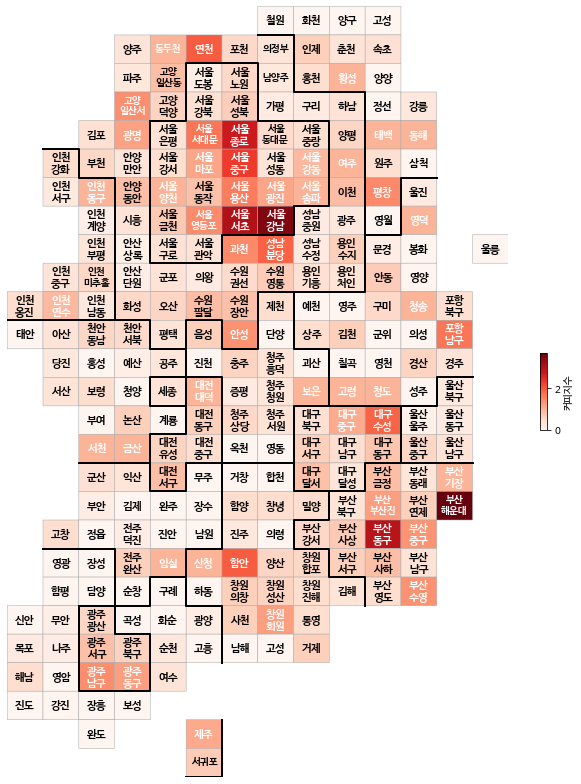

In [64]:
drawKorea('커피지수', df, 'Reds')

In [65]:
# 스타벅스 Top 5 지역
df.sort_values(by='스타벅스', ascending=False).head()

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
66,7,7,서울 강남,27,79,47,9,3.500000
76,8,7,성남 분당,16,45,7,11,1.925926
44,5,6,서울 중구,17,43,8,5,2.318182
65,7,6,서울 서초,18,42,26,4,3.090909
57,6,8,서울 송파,32,33,8,8,1.025000


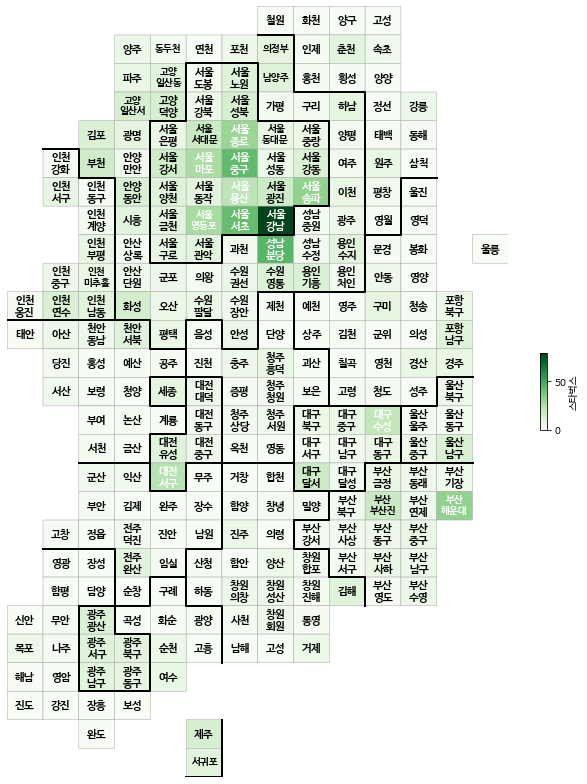

In [66]:
drawKorea('스타벅스', df, 'Greens')